# SVMによる分類

### 身長、体重からBMIを計算して、痩せてる・普通・太ってるを分類する
### BMI = 体重(kg) ÷ 身長(m) x 身長(m)
### BMIが18.5以上25未満は普通

Data set, {'thin': 315, 'normal': 311, 'fat': 374}
正解率= 0.985
[[73  2  0]
 [ 1 66  0]
 [ 0  0 58]]
レポート=
               precision    recall  f1-score   support

         fat       0.99      0.97      0.98        75
      normal       0.97      0.99      0.98        67
        thin       1.00      1.00      1.00        58

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.99       200



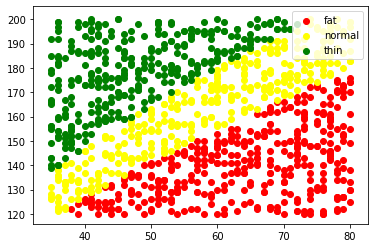

In [9]:
import sys
import random
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics
import pandas as pd

# BMIを計算 ラベルを返す
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    
    if bmi > 25:
        return "fat"
    
    elif bmi < 18.5:
        return "thin"
    else:
        return "normal"
    
 # データ出力
fp = open("bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

# データセット作成
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(1000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
    #print("Data set,", h,w,label)
fp.close()

print("Data set,", cnt) 
        
# 身長・体重データ読み込み
tbl = pd.read_csv("bmi.csv")

# カラム(列)をスライスして正規化
label = tbl["label"]
w = tbl["weight"] / 100        # 最大100kgとする
h = tbl["height"] / 200        # 最長200cmとする
wh = pd.concat([w, h], axis=1) 

# データセットを学習データ、テストデータ、学習データラベル、テストデータラベルに分ける
data_train, data_test, label_train, label_test = train_test_split(wh, label , test_size=0.2,random_state=4)


# データを学習
clf = SVC(C=3,gamma="scale")
clf.fit(data_train, label_train)

# データを予測
predict = clf.predict(data_test)

# 合っているか結果を確認
ac_score = accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print("正解率=", ac_score)
print(confusion_matrix(label_test, predict,labels=["fat","normal","thin"]))
print("レポート=\n", cl_report)


# 念のためデータの散布図を描く
tbl = pd.read_csv("bmi.csv", index_col=2)

# PLOT
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "green")

ax.legend() 
plt.savefig("bmi-test.png")
#plt.show()
